In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv('../../EDA/result3.csv')
df['location_count'] = df['location'].apply(lambda x: len(eval(x)))
df.drop('location',axis=1, inplace=True)
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11
...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1


In [12]:
df.describe()

,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count
count,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,0.506229,58.731429,8.259046e+06,6928.857143,301.869894,255.845714,6.985951,263.702857,3.188571
std,2.179778,150.118122,9.005483e+06,23910.324134,975.961738,1295.501112,15.510840,763.627371,3.029337
min,0.000000,1.000000,7.763158e+05,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.643274e+06,0.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000
50%,0.000000,6.000000,6.299805e+06,0.000000,-1.000000,-1.000000,0.000000,0.000000,2.000000
75%,0.050000,30.000000,9.374432e+06,555.500000,12.254464,0.000000,2.531250,24.500000,4.000000
max,21.900000,1111.000000,8.588051e+07,143000.000000,5567.955357,11400.000000,69.312500,4633.000000,13.000000


In [13]:
# standardize the data
scaler = StandardScaler()
df[['tiobe index ratings_T','job amount_T','average salary_T','linkedin skill_T',
    	'avg wiki views (monthly)_T','github user count_T','average search count_T',
        'stack overflow count_T','location_count_T']] = scaler.fit_transform(df[['tiobe index ratings','job amount',
        'average salary','linkedin skill',
    	'avg wiki views (monthly)','github user count','average search count',
        'stack overflow count','location_count']])

df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,tiobe index ratings_T,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,4.602523,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,1.395774,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,0.024739,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,-0.232905,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,0.323790,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,-0.081079,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,-0.232905,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532


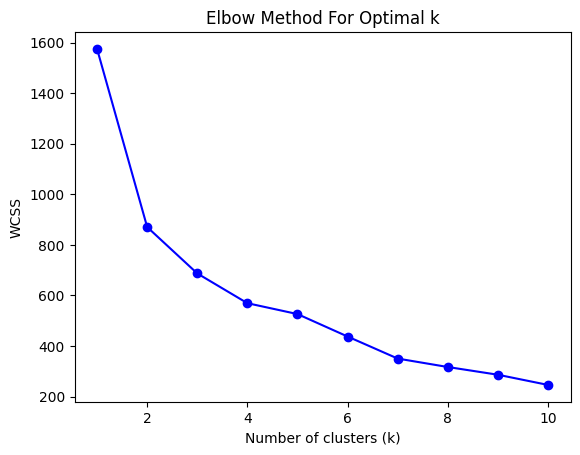

In [14]:
wcss = []
K = range(1, 11)  

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

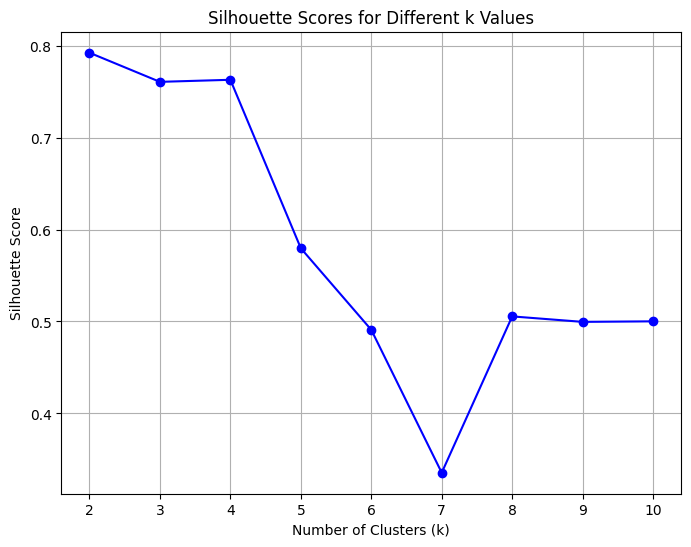

The best number of clusters (k) is: 2


In [17]:
k_range = range(2, 11)  
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])
    
    score = silhouette_score(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                                 'linkedin skill_T', 'avg wiki views (monthly)_T', 
                                 'github user count_T', 'average search count_T', 
                                 'stack overflow count_T', 'location_count_T']], kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"The best number of clusters (k) is: {best_k}")


In [25]:
print(silhouette_scores)

[0.7921974691347248, 0.7605315089329624, 0.7627706016674607, 0.5796212895638742, 0.4909344652572501, 0.3355662228699631, 0.5055181992129795, 0.4995773855791118, 0.5001592120324688]


In [18]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])

df['kmeans_4'] = kmeans4.labels_

kmeans2 = KMeans(n_clusters=2)
kmeans2.fit(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                   'linkedin skill_T', 'avg wiki views (monthly)_T', 
                   'github user count_T', 'average search count_T', 
                   'stack overflow count_T', 'location_count_T']])

df['kmeans_2'] = kmeans2.labels_

In [19]:
df

,programming language,tiobe index ratings,job amount,average salary,linkedin skill,avg wiki views (monthly),github user count,average search count,stack overflow count,location_count,...,job amount_T,average salary_T,linkedin skill_T,avg wiki views (monthly)_T,github user count_T,average search count_T,stack overflow count_T,location_count_T,kmeans_4,kmeans_2
0,Java,10.51,728,6.153528e+06,103000,3925.598214,6800,28.133930,2531,12,...,4.471072,-0.234475,4.029507,3.723636,5.065941,1.367345,2.977634,2.917045,2,1
1,JavaScript,3.54,1111,6.168157e+06,118000,5276.794643,11400,15.482143,4633,12,...,7.029718,-0.232846,4.658651,5.112086,8.626879,0.549330,5.738184,2.917045,2,1
2,Dart,0.56,32,6.250161e+06,945,52.953846,877,37.000000,963,6,...,-0.178580,-0.223714,-0.250981,-0.255779,0.480846,1.940589,0.918385,0.930730,0,0
3,Node.js,0.00,450,5.596209e+06,34000,662.803571,-1,2.633929,2207,8,...,2.613884,-0.296539,1.135443,0.370885,-0.198829,-0.281385,2.552126,1.592835,0,0
4,PHP,1.21,505,5.762279e+06,123000,4083.750000,8600,26.616071,3147,11,...,2.981313,-0.278045,4.868366,3.886148,6.459352,1.269206,3.786625,2.585993,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Dc,0.00,1,5.592859e+06,0,-1.000000,-1,0.000000,0,1,...,-0.385677,-0.296912,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1,0
171,VBScript,0.33,2,3.327448e+06,692,175.750000,-1,21.366070,0,1,...,-0.378996,-0.549193,-0.261592,-0.129597,-0.198829,0.929762,-0.346320,-0.724532,1,0
172,CORAL,0.00,1,3.244448e+06,0,-1.000000,-1,0.000000,0,1,...,-0.385677,-0.558436,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1,0
173,UniVerse,0.00,1,1.520833e+06,0,-1.000000,-1,0.000000,0,1,...,-0.385677,-0.750381,-0.290617,-0.311220,-0.198829,-0.451684,-0.346320,-0.724532,1,0


C:\Users\Asus\AppData\Local\Temp\ipykernel_11812\2843710328.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')


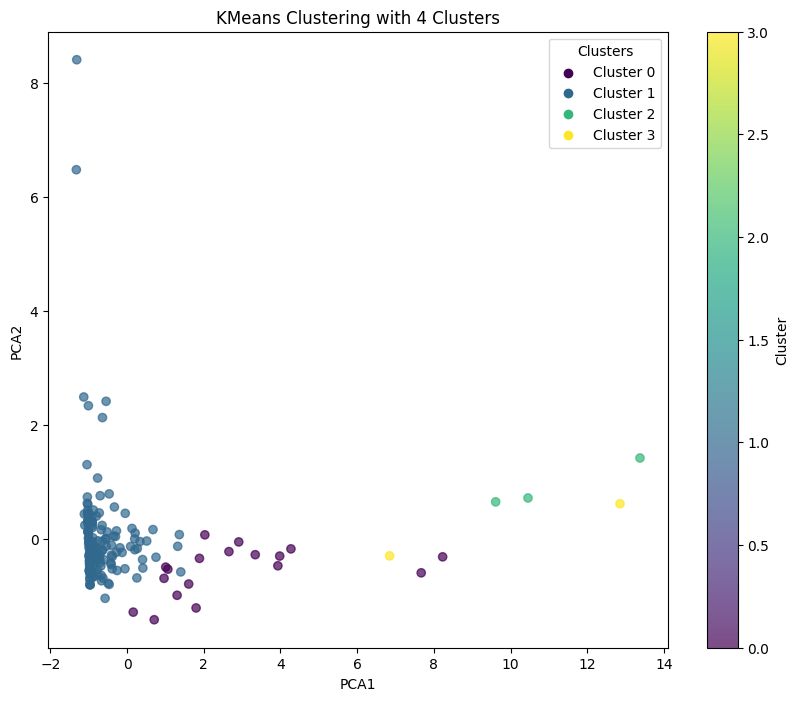

In [21]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                               'linkedin skill_T', 'avg wiki views (monthly)_T', 
                               'github user count_T', 'average search count_T', 
                               'stack overflow count_T', 'location_count_T']])

df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['kmeans_4']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis',alpha=0.7)
for i in range(4):  
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering with 4 Clusters')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11812\1080138110.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')


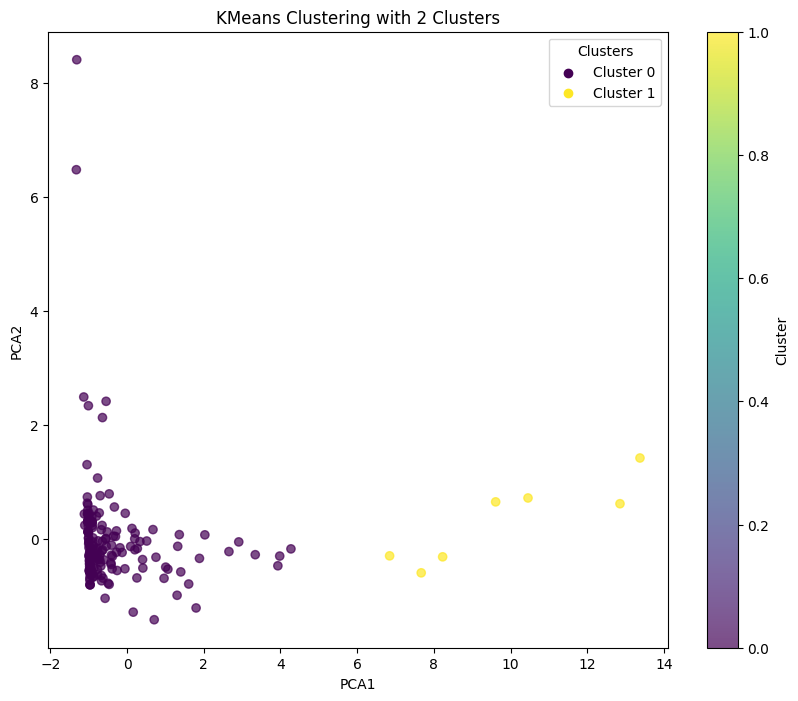

In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['tiobe index ratings_T', 'job amount_T', 'average salary_T', 
                               'linkedin skill_T', 'avg wiki views (monthly)_T', 
                               'github user count_T', 'average search count_T', 
                               'stack overflow count_T', 'location_count_T']])

df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['kmeans_2']

plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df_pca['Cluster'], cmap='viridis',alpha=0.7)
for i in range(2):  
    plt.scatter([], [], c=scatter.cmap(scatter.norm(i)), label=f'Cluster {i}')

plt.legend(title='Clusters')
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('KMeans Clustering with 2 Clusters')
plt.show()